In [1]:
import pandas as pd

In [2]:
dataset= pd.read_csv('Social_Network_Ads.csv')
dataset.sample(3)

,User ID,Gender,Age,EstimatedSalary,Purchased
309,15652400,Female,38,50000,0
273,15589449,Male,39,106000,1
161,15670619,Male,25,90000,0


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [4]:
dataset.shape

(400, 5)

In [6]:
dataset_cleaned = dataset.drop(['User ID'], axis=1)

In [7]:
dataset_cleaned.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Boxplot of Age')

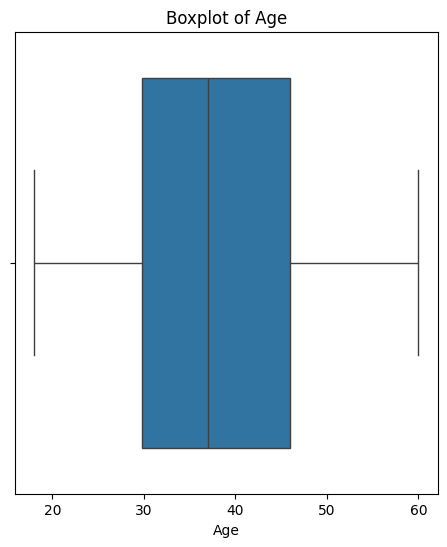

In [10]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=dataset_cleaned, x='Age')
plt.title('Boxplot of Age')

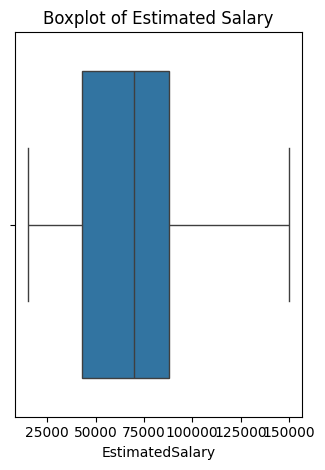

In [14]:
plt.subplot(1, 2, 2)
sns.boxplot(data=dataset_cleaned, x='EstimatedSalary')
plt.title('Boxplot of Estimated Salary')
plt.tight_layout()
plt. show()

In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [16]:
dataset_cleaned = dataset.copy()

In [17]:
label_encoder = LabelEncoder()
dataset_cleaned['Gender'] = label_encoder.fit_transform(dataset_cleaned['Gender'])


In [18]:
X = dataset_cleaned.iloc[:, :-1].values
y = dataset_cleaned.iloc[:, -1].values 

In [19]:
scaler= StandardScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
print(X_scaled[:5])

[[-0.93657932  1.02020406 -1.78179743 -1.49004624]
 [ 1.66838653  1.02020406 -0.25358736 -1.46068138]
 [-0.32087714 -0.98019606 -1.11320552 -0.78528968]
 [-1.23369247 -0.98019606 -1.01769239 -0.37418169]
 [ 1.57138881  1.02020406 -1.78179743  0.18375059]]


In [23]:
#knn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

In [24]:
print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


Training set size: 300
Test set size: 100


In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [27]:
y_pred = knn_classifier.predict(X_test)

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
# Confusion matrix
cm= confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)
# Accuracy, error rate, precision, and recall
accuracy= accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
precision= precision_score(y_test, y_pred)
recall= recall_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy* 100:.2f}%")
print(f"Error Rate: {error_rate * 100:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")


Confusion Matrix:
[[60  3]
 [ 5 32]]

Accuracy: 92.00%
Error Rate: 8.00%
Precision: 0.91
Recall: 0.86
